In [1]:
# Importation des modules necessaires
import sys
sys.path.insert(0,'../')
import argopy
import xarray as xr
import glob
import numpy as np
from m_argo_data import read_argo_data_for_NCEP
from m_NCEP_data import *
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#
# Init.
#
num_float = '6902802'
rep_data_argo = '/Users/chemon/ARGO_NEW/NEW_LOCODOX/data_test/'
rep_NCEP_data= '/Users/chemon/ARGO_NEW/LOCODOX/DATA/LOCODOX_EXTERNAL_DATA/NCEP/'

which_psal = 3
code_inair = [699,711,799]
code_inwater = [690,710]
min_pres = 0
max_pres = 10

In [3]:
# Lecture donnees ARGO
dsair,dsinwater,optode_height,launch_date = read_argo_data_for_NCEP(num_float,rep_data_argo,which_psal,code_inair,code_inwater,min_pres,max_pres)

Recherche de la valeur de PSAL dans Sprof correcte la plus proche de la surface entre 0 et 10
Recherche de la valeur de PSAL_ADJUSTED dans Sprof correcte la plus proche de la surface entre 0 et 10
On conserve les donnees PSAL_ADJUSTED quand elles existent.
Sinon, on prend les donnees PSAL.


In [4]:
print(dsair['PSAL'])

<xarray.DataArray 'PSAL' (CYCLE_NUMBER: 147)>
array([34.81299973, 34.79100037, 34.81100082, 34.8429985 , 34.85400009,
       34.85400009, 34.8769989 , 34.89300156, 34.84899902, 34.81399918,
       34.80099869, 34.80400085, 34.81800079, 34.8390007 , 34.8370018 ,
       34.85599899, 34.85499954, 34.86299896, 34.82899857, 34.85200119,
       34.80799866, 34.80799866, 34.80400085, 34.73899841, 34.72600174,
       34.68799973, 34.6969986 , 34.69599915, 34.62599945, 34.59400177,
       34.63600159, 34.74300003, 34.63100052, 34.66999817, 34.61600113,
       34.65399933, 34.6629982 , 34.63299942, 34.59000015, 34.71900177,
       34.72100067, 34.68700027, 34.70600128, 34.71500015, 34.73400116,
       34.70899963, 34.73400116, 34.7519989 , 34.77799988, 34.80099869,
       34.81900024, 34.83499908, 34.82699966, 34.83100128, 34.80199814,
       34.82500076, 34.81600189, 34.81700134, 34.79499817, 34.75400162,
       34.77500153, 34.72800064, 34.76800156, 34.72999954, 34.69499969,
       34.71300125

In [5]:
# Chargement des donnees NCEP si besoin
ftp_server = 'ftp.cdc.noaa.gov'
rep_ftp = 'Datasets/ncep.reanalysis/surface'
rep_local = '/Users/chemon/ARGO_NEW/NEW_LOCODOX/NCEP_DATA/'
ncep_variables = ['slp','air.sig995','rhum.sig995']

In [6]:
download_NCEP(dsair['JULD'],ftp_server,rep_ftp,rep_local,ncep_variables)

Telechargement des donnees NCEP si besoin
File slp.2018.nc already exists.
File air.sig995.2018.nc already exists.
File rhum.sig995.2018.nc already exists.
File slp.2019.nc already exists.
File air.sig995.2019.nc already exists.
File rhum.sig995.2019.nc already exists.
File slp.2020.nc already exists.
File air.sig995.2020.nc already exists.
File rhum.sig995.2020.nc already exists.
File slp.2021.nc already exists.
File air.sig995.2021.nc already exists.
File rhum.sig995.2021.nc already exists.
File slp.2022.nc already exists.
File air.sig995.2022.nc already exists.
File rhum.sig995.2022.nc already exists.


In [7]:
# Lecture donnees NCEP et interpolation sur date/position ARGO des donnees InAir.
# Les donnees Inwater sont faites legerement avant les donnees InAir.
ds_NCEP_air,ds_NCEP_slp,ds_NCEP_rhum = read_NCEP(rep_NCEP_data,dsair['LONGITUDE_ARGO'],dsair['LATITUDE_ARGO'],dsair['JULD'])


In [8]:
# Calcul de PPOX_NCEP
z0q = 1e-4
NCEP_PPOX = calcul_NCEP_PPOX(dsinwater,ds_NCEP_air,ds_NCEP_slp,ds_NCEP_rhum,optode_height,z0q)

In [9]:
print(dsair['PSAL'][91:123])
print(dsair['CYCLE_NUMBER'][91:123])

<xarray.DataArray 'PSAL' (CYCLE_NUMBER: 32)>
array([34.87798691, 34.84551239, 34.85805893, 34.8605957 , 34.81410217,
       34.62356949, 34.8151741 , 34.8547287 , 34.74020767, 34.71474457,
       34.82133484, 34.79684448, 34.70934677, 34.66885376, 34.72642136,
       34.86197662, 34.60936737, 33.99552155, 33.0934639 , 32.27946854,
       34.49236679, 33.06792831, 32.88430405, 33.41214752, 33.08341217,
       32.70065308, 33.26755142,         nan, 33.68683243, 33.54019547,
       33.4256134 , 33.63199997])
Coordinates:
  * CYCLE_NUMBER  (CYCLE_NUMBER) float64 103.0 104.0 105.0 ... 132.0 133.0 134.0
Attributes:
    long_name:       Practical salinity
    standard_name:   sea_water_salinity
    units:           psu
    valid_min:       2.0
    valid_max:       41.0
    C_format:        %9.3f
    FORTRAN_format:  F9.3
    resolution:      0.001
    casted:          1
<xarray.DataArray 'CYCLE_NUMBER' (CYCLE_NUMBER: 32)>
array([103., 104., 105., 106., 107., 108., 109., 110., 111., 112., 113.

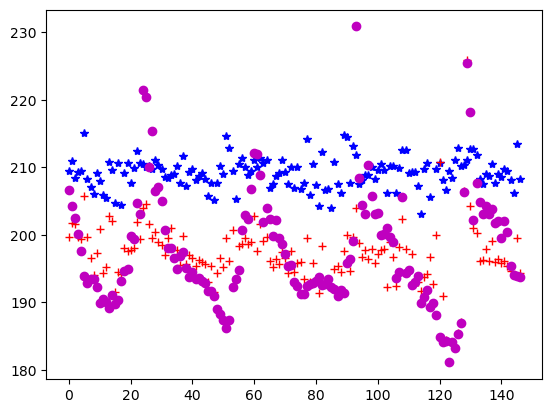

In [10]:
# Trace
plt.figure()
plt.plot(NCEP_PPOX,'*b')
plt.plot(dsair['PPOX_DOXY'],'r+')
plt.plot(dsinwater['PPOX_DOXY'],'om')

In [9]:
# Calcul de la solution avec un simple gain sans et avec Carry_Over
###################################################################
PPOX1 = dsair['PPOX_DOXY'].values
PPOX2 = dsinwater['PPOX_DOXY'].values
delta_T = (dsair['JULD'].values - launch_date)
delta_T = delta_T.astype(float)
delta_T = delta_T/1e9/86400 # Difference en jour

In [10]:
# Calcul Gain sans CarryOver
def model_Gain(X,G):
    return G * X 
    
initial_guess = 1  # Valeurs initiales pour G 
params_Gain, covariance = curve_fit(model_Gain, PPOX1, NCEP_PPOX, p0=initial_guess,nan_policy='omit')
print(params_Gain)
#params_Gain, covariance = curve_fit(model_Gain, PPOX1, NCEP_PPOX, p0=initial_guess,nan_policy='omit',method='dogbox')
#print(params_Gain)

Gain = params_Gain

[1.06150129]


In [11]:
# Calcul Gain avec CarryOver
def model_Gain_CarryOver(X,G,C):
    return G * (X[0] - C * X[1]) / (1 - C) # C : Carry-over

initial_guess = [1, 0]  # Valeurs initiales pour G et C
params_Gain_CarryOver, covariance = curve_fit(model_Gain_CarryOver, [PPOX1,PPOX2], NCEP_PPOX, p0=initial_guess,nan_policy='omit')
print(params_Gain_CarryOver)
#params_Gain_CarryOver, covariance = curve_fit(model_Gain_CarryOver, [PPOX1,PPOX2], NCEP_PPOX, p0=initial_guess,nan_policy='omit',method='trf')
#print(params_Gain_CarryOver)
#params_Gain_CarryOver, covariance = curve_fit(model_Gain_CarryOver, [PPOX1,PPOX2], NCEP_PPOX, p0=initial_guess,nan_policy='omit',method='dogbox')
#print(params_Gain_CarryOver)

Gain_CarryOver,C_estime = params_Gain_CarryOver

[1.06168545 0.09066918]


In [12]:
def model_Gain_Derive(X,G,D):
    return (G * (1 + (D * X[1])/(365*100)) * X[0] )

# Ajustement des paramètres G et D
initial_guess = [1, 0]  # Valeurs initiales pour G et D et C
params_Gain_Derive, covariance,info,mesg,ier = curve_fit(model_Gain_Derive, [PPOX1,delta_T], NCEP_PPOX, p0=initial_guess,nan_policy='omit',full_output=True)
print(params_Gain_Derive)
print(np.sqrt(np.diag(covariance)))
Gain_Derive, Derive = params_Gain_Derive

[1.0505639  0.50892684]
[0.0043184  0.17478419]


In [13]:
def model_Gain_Derive_CarryOver(X,G,C,D):
    return (G / (1-C) * (1 + D / 100 * X[2]/365) * (X[0] - C * X[1]) )

# Ajustement des paramètres G et D
initial_guess = [1, 0, 0]  # Valeurs initiales pour G et D et C
params_Gain_Derive_CarryOver, covariance = curve_fit(model_Gain_Derive_CarryOver, [PPOX1,PPOX2,delta_T], NCEP_PPOX, p0=initial_guess,nan_policy='omit')

Gain_Derive_CarryOver, C_estime, Derive_CarryOver = params_Gain_Derive_CarryOver
print(Gain_Derive,Derive)
print(Gain_Derive_CarryOver,Derive_CarryOver)

1.0505639024882532 0.5089268375093455
1.0491167424077168 0.5904557336542134


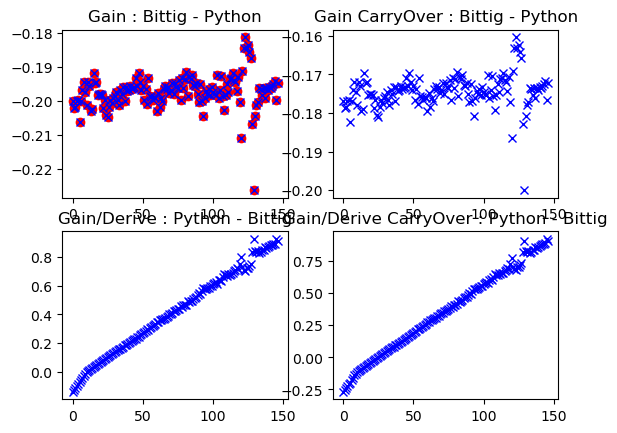

In [14]:
Gain_Derive_bittig = 1.0513
Derive_bittig = 0.389
Gain_Derive_bittig_CarryOver = 1.0505
Derive_bittig_CarryOver = 0.456
Gain_bittig = 1.0605
Gain_bittig_CarryOver = 1.0608

plt.figure()
plt.subplot(2,2,1)
plt.plot(Gain_bittig *  PPOX1 - Gain * PPOX1,'or')
plt.plot(Gain_bittig *  PPOX1 - model_Gain(PPOX1,*params_Gain),'xb')
plt.title('Gain : Bittig - Python')
plt.subplot(2,2,2)
#plt.plot(Gain_bittig_CarryOver *  PPOX1 - model_Gain_CarryOver([PPOX1,PPOX2],*params_Gain_CarryOver),'or')
plt.plot(Gain_bittig_CarryOver *  PPOX1 - Gain_CarryOver * PPOX1,'xb')

plt.title('Gain CarryOver : Bittig - Python')
plt.subplot(2,2,3)
plt.plot(Gain_Derive * (1 + Derive / 100 * delta_T/365) * PPOX1 - Gain_Derive_bittig * (1 + Derive_bittig / 100 * delta_T/365) * PPOX1,'xb')
plt.title('Gain/Derive : Python - Bittig')
plt.subplot(2,2,4)
plt.plot(Gain_Derive_CarryOver * (1 + Derive_CarryOver / 100 * delta_T/365) * PPOX1 - Gain_Derive_bittig_CarryOver * (1 + Derive_bittig_CarryOver / 100 * delta_T/365) * PPOX1,'xb')
plt.title('Gain/Derive CarryOver : Python - Bittig')
plt.show()

In [15]:
# Calcul de la derive comme Locodox
#
valid_index = np.isfinite(NCEP_PPOX)
PPOX1 = PPOX1[valid_index]
PPOX2 = PPOX2[valid_index]
delta_T = delta_T[valid_index]
NCEP_PPOX = NCEP_PPOX[valid_index]
degre_poly = 1
Derive_Locodox1 = np.polyfit(delta_T,NCEP_PPOX/PPOX1,degre_poly)

def model_test(X,A,B):
    return (A*X +B) 
    
def model_test2(X,A,B):
    return (A*X[1] +B) * X[0]

# Ajustement des paramètres G et D
initial_guess = [1, 0]  # Valeurs initiales pour G et D et C
NCEP_PPOX_UN = NCEP_PPOX.copy()
NCEP_PPOX_UN[:] = 1
params_test, covariance,info,mesg,ier = curve_fit(model_test2, [PPOX1,delta_T], NCEP_PPOX, p0=initial_guess,nan_policy='omit',full_output=True)
params_test2, covariance,info,mesg,ier = curve_fit(model_test2, [PPOX1/NCEP_PPOX,delta_T], NCEP_PPOX_UN, p0=initial_guess,nan_policy='omit',full_output=True)
params_test3, covariance,info,mesg,ier = curve_fit(model_test, delta_T, NCEP_PPOX/PPOX1, p0=initial_guess,nan_policy='omit',full_output=True)

print(Derive_Locodox1)
print(params_test)
print(params_test2)
print(params_test3)

[1.72152658e-05 1.04967266e+00]
[1.46482144e-05 1.05056391e+00]
[1.46610129e-05 1.05056503e+00]
[1.72152623e-05 1.04967266e+00]


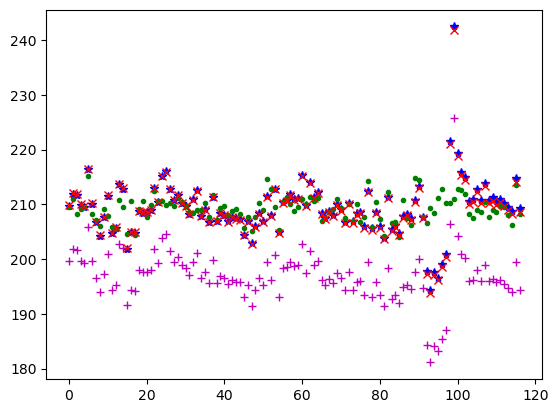

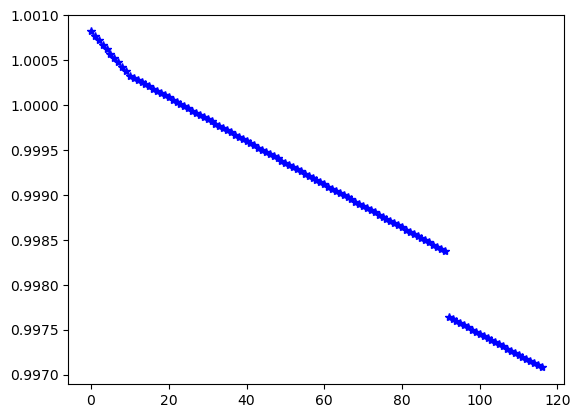

[1.72152658e-05 1.04967266e+00]


In [16]:
plt.figure()
plt.plot(np.polyval(Derive_Locodox1,delta_T)*PPOX1,'*b')
plt.plot(PPOX1,'+m')
plt.plot(NCEP_PPOX,'.g')
#plt.plot((Derive_Locodox1[0]*delta_T+Derive_Locodox1[1])*PPOX1,'xr')
plt.plot(Gain_Derive * (1 + (Derive * delta_T)/(365*100)) * PPOX1, 'xr')
plt.figure()
plt.plot(Gain_Derive * (1 + (Derive * delta_T)/(365*100)) * PPOX1 / (np.polyval(Derive_Locodox1,delta_T)*PPOX1),'*b')
plt.show()
print(Derive_Locodox1)

In [17]:
# Sans CarryOver TEST
def model_Gain_Derive_Locodox(X,G):
    return X * G

initial_guess = 1
params_Locodox, covariance = curve_fit(model_Gain_Derive_Locodox,(params_test[0]*delta_T+params_test[1])*PPOX1 , NCEP_PPOX, p0=initial_guess)
Gain_Locodox1 = params_Locodox
print(params_Locodox)
#print(np.sqrt(np.diag(covariance)))

# On en deduit D associe a la formule G * (1 + D / 100 * delta_T/365) * PPOX1 
def model_Locodox(X, G, D):
    return (G * (1 + (D * X[1])/(365*100)) * X[0] )
#    return  G * (1 + D / 100 * X[1]/365)  * X[0] # Sans carry-over

initial_guess = [1, 0]  # Valeurs initiales pour G et D
params_Locodox, covariance = curve_fit(model_Locodox, [PPOX1,delta_T], Gain_Locodox1*(params_test[0]*delta_T+params_test[1])*PPOX1, p0=initial_guess)


#params_Locodox, covariance = curve_fit(model_Locodox, [PPOX1,delta_T], np.polyval(Derive_Locodox1,delta_T)*PPOX1, p0=initial_guess)
print(params_Locodox)
#print(np.sqrt(np.diag(covariance)))
#Gain_Locodox, Derive_Locodox = params_Locodox
Gain_Locodox = Gain_Locodox1 * params_test[1]
Derive_Locodox = params_test[0]*100*365/params_test[1]
print(Gain_Locodox,Derive_Locodox)
print(Gain_Derive,Derive)


[1.]
[1.05056391 0.50892651]
[1.05056391] 0.5089265116495119
1.0505639024882532 0.5089268375093455


In [32]:
def model_Gain_Derive(X,G,D):
    return (G * (1 + (D * X)/(365*100)) )

# Ajustement des paramètres G et D
initial_guess = [1, 0]  # Valeurs initiales pour G et D et C
params_Gain_Derive, covariance,info,mesg,ier = curve_fit(model_Gain_Derive, delta_T, NCEP_PPOX/PPOX1, p0=initial_guess,nan_policy='omit',full_output=True)
print(params_Gain_Derive)
#print(np.sqrt(np.diag(covariance)))
Gain_Derive2, Derive2 = params_Gain_Derive

# Sans CarryOver Test2
def model_Gain_Derive_Locodox(X,G):
    return X * G

initial_guess = 1
params_Locodox, covariance = curve_fit(model_Gain_Derive_Locodox, np.polyval(Derive_Locodox1,delta_T), NCEP_PPOX/PPOX1, p0=initial_guess)
Gain_Locodox1 = params_Locodox
print(params_Locodox)
#print(np.sqrt(np.diag(covariance)))

# On en deduit D associe a la formule G * (1 + D / 100 * delta_T/365) * PPOX1 
def model_Locodox(X, G, D):
    return (G * (1 + (D * X)/(365*100)))
#    return  G * (1 + D / 100 * X[1]/365)  * X[0] # Sans carry-over

initial_guess = [1, 0]  # Valeurs initiales pour G et D
params_Locodox, covariance = curve_fit(model_Locodox, delta_T, Gain_Locodox1*np.polyval(Derive_Locodox1,delta_T), p0=initial_guess)


#params_Locodox, covariance = curve_fit(model_Locodox, [PPOX1,delta_T], np.polyval(Derive_Locodox1,delta_T)*PPOX1, p0=initial_guess)
print(params_Locodox)
#print(np.sqrt(np.diag(covariance)))
#Gain_Locodox, Derive_Locodox = params_Locodox
Gain_Locodox2 = Gain_Locodox1 * Derive_Locodox1[1]
Derive_Locodox2 = Derive_Locodox1[0]*100*365/Derive_Locodox1[1]
print(Gain_Locodox2,Derive_Locodox2)
print(Gain_Derive2,Derive2)

[1.04967266 0.59862202]
[1.]
[1.04967266 0.59862205]
[1.04967266] 0.5986220548359624
1.049672657475801 0.5986220157046681


In [31]:
print(type(NCEP_PPOX))
bid = NCEP_PPOX.copy()
bid[:]=1
bid2=bid
print(bid2[0:10],bid[0:10])
bid2[:]=22
print(bid2[0:10],bid[0:10])
bid[:]=33
print(bid2[0:10],bid[0:10])


<class 'numpy.ndarray'>
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[22. 22. 22. 22. 22. 22. 22. 22. 22. 22.] [22. 22. 22. 22. 22. 22. 22. 22. 22. 22.]
[33. 33. 33. 33. 33. 33. 33. 33. 33. 33.] [33. 33. 33. 33. 33. 33. 33. 33. 33. 33.]


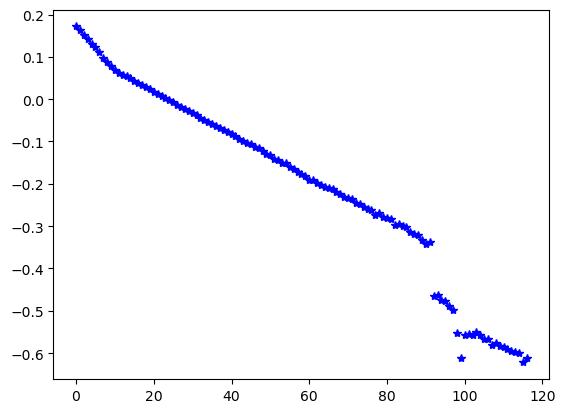

In [23]:
plt.figure()
plt.plot((1.05056391 * (1 + ( 0.5089265116495119 * delta_T)/(365*100))*PPOX1) -  (1.04967266 * (1 + ( 0.59862205 * delta_T)/(365*100))*PPOX1),'*b')


In [20]:
# Avec CarryOver
PPOX2 = np.polyval(Derive_Locodox1,delta_T)*PPOX2 # Application de la derive sur PPOX2
def model_Gain_Derive_Locodox_CarryOver(X,G,C):
    return G / (1-C) * (X - C * PPOX2) # C : Carry-over

initial_guess = [1,0]
params_Locodox, covariance = curve_fit(model_Gain_Derive_Locodox_CarryOver, np.polyval(Derive_Locodox1,delta_T)*PPOX1, NCEP_PPOX, p0=initial_guess)
Gain_Locodox_CarryOver1, C_estime = params_Locodox

def model_Locodox2(X,G,D,C):
    return (G/(1-C) * (1 + D / 100 * X[2]/365) * (X[0] - C * X[1]) )

#def model_Locodox3(X,G,D,C):
#    return (G/(1-C) * (1 + D / 100 * delta_T/365) * (X - C * PPOX2) )
    
initial_guess = [1, 0, 0]  # Valeurs initiales pour G et D
params_Locodox_CarryOver, covariance = curve_fit(model_Locodox2, [PPOX1,PPOX2,delta_T], Gain_Locodox_CarryOver1*np.polyval(Derive_Locodox1,delta_T)*PPOX1, p0=initial_guess)  
#params_Locodox_CarryOver, covariance = curve_fit(model_Locodox3, Gain_Locodox_CarryOver1*np.polyval(Derive_LOCODOX1,delta_T)*PPOX1, Gain_Locodox_CarryOver1*np.polyval(Derive_LOCODOX1,delta_T)*PPOX1,p0=initial_guess)  
print(params_Locodox_CarryOver)

Gain_Locodox_CarryOver = Gain_Locodox_CarryOver1 * Derive_Locodox1[1]
Derive_Locodox_CarryOver = Derive_Locodox1[0]*100*365/Derive_Locodox1[1]

print(Gain_Locodox,Derive_Locodox)
print(Gain_Derive,Derive)
print(Gain_Locodox_CarryOver,Derive_Locodox_CarryOver)
print(Gain_Derive_CarryOver,Derive_CarryOver)

[1.04894435e+00 5.98622057e-01 2.10336216e-09]
[1.04967266] 0.5986220548359624
1.049672657475801 0.5986220157046681
1.048944352683347 0.5986220548359624
1.0491167424077168 0.5904557336542134


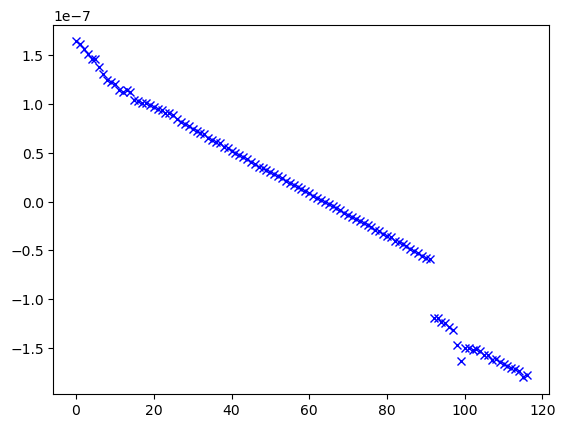

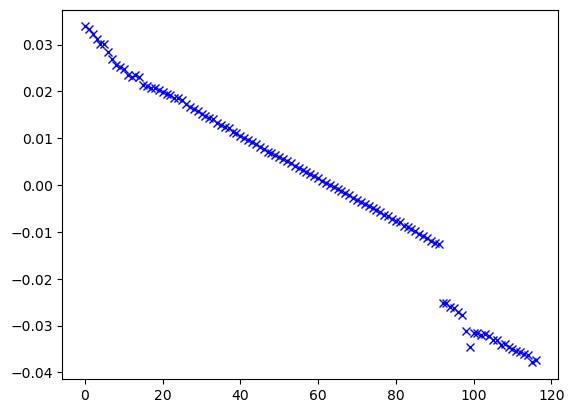

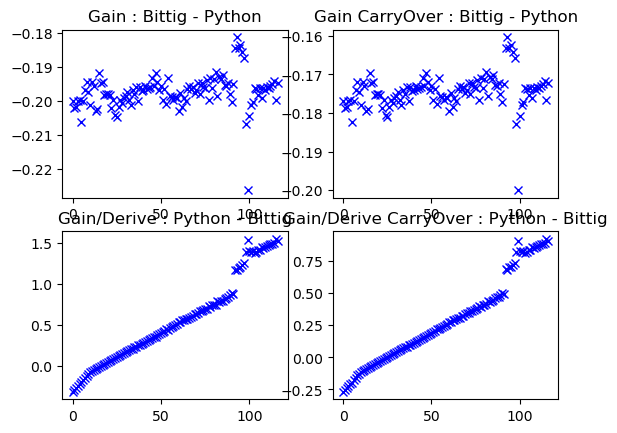

201.78134155273438
211.91597420851323
212.2053685480709
211.80221995388592
212.05639065268062


In [21]:
Gain_Derive_bittig = 1.0513
Derive_bittig = 0.389
Gain_Derive_bittig_CarryOver = 1.0505
Derive_bittig_CarryOver = 0.456
Gain_bittig = 1.0605
Gain_bittig_CarryOver = 1.0608
plt.figure()
plt.plot(Gain_Derive * (1 + Derive / 100 * delta_T/365) * PPOX1 - Gain_Locodox * (1 + Derive_Locodox / 100 * delta_T/365) * PPOX1,'xb')
plt.figure()
plt.plot(Gain_Derive_CarryOver * (1 + Derive_CarryOver / 100 * delta_T/365) * PPOX1 - Gain_Locodox_CarryOver * (1 + Derive_Locodox_CarryOver / 100 * delta_T/365) * PPOX1,'xb')

plt.figure()
plt.subplot(2,2,1)
plt.plot(Gain_bittig *  PPOX1 - Gain * PPOX1,'xb')
plt.title('Gain : Bittig - Python')
plt.subplot(2,2,2)
plt.plot(Gain_bittig_CarryOver *  PPOX1 - Gain_CarryOver * PPOX1,'xb')
plt.title('Gain CarryOver : Bittig - Python')
plt.subplot(2,2,3)
plt.plot(Gain_Derive * (1 + Derive / 100 * delta_T/365) * PPOX1 - Gain_Derive_bittig * (1 + Derive_bittig / 100 * delta_T/365) * PPOX1,'xb')
plt.title('Gain/Derive : Python - Bittig')
plt.subplot(2,2,4)
plt.plot(Gain_Derive_CarryOver * (1 + Derive_CarryOver / 100 * delta_T/365) * PPOX1 - Gain_Derive_bittig_CarryOver * (1 + Derive_bittig_CarryOver / 100 * delta_T/365) * PPOX1,'xb')
plt.title('Gain/Derive CarryOver : Python - Bittig')
plt.show()

